
    Baseline accuracy
    Multiple evaluation metrics
    Hyper parameter tuning
    Some type of validation strategy
Constraints

    You must use RandomForestClassifier() from sklearn. We want you to focus on model evaluation, not on the model choice nor on the data preprocessing.
    Create functions, do not create a single huge script
    Each function or class has to be typed
    Each function or class has to contain a docstring in a consistent format.
    Your code should be formatted with black.
    Your code should be commented.
    Your code should be cleaned of any commented unused code.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
import itertools

from sklearn.svm import SVC 


In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [3]:
test = pd.read_csv("data_test.csv")
train = pd.read_csv("data_train.csv")


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)


In [4]:

print(train.head())
print(train.shape)
print(test.head())
print(train.income.value_counts())
print(test.income.value_counts())


   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          0   77516          0             13               0   
1   50          1   83311          0             13               1   
2   38          2  215646          1              9               2   
3   53          2  234721          2              7               1   
4   28          2  338409          0             13               1   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             0     0    0          2174             0   
1           1             1     0    0             0             0   
2           2             0     0    0             0             0   
3           2             1     1    0             0             0   
4           3             2     1    1             0             0   

   hours-per-week  native-country  income  
0              40               0       0  
1              13               0       0  
2              40   

In [5]:
def null (df):
    ''' used to find sum of null and columns'''
    for names in df.columns:

        if df[names].isnull().sum() > 0:
            print(names , df[names].isnull().sum())
        else:
            continue
null(train)
null(test)

<AxesSubplot:>

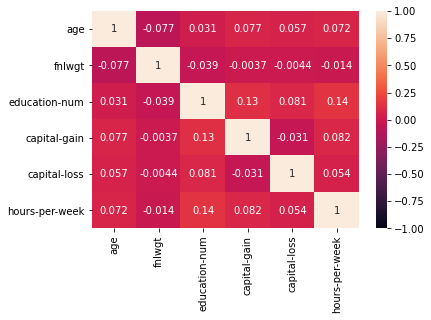

In [6]:
df = pd.concat([test, train])

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex', 'native-country']
numerical = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
             'hours-per-week']

sns.heatmap(data=df[numerical].corr(), annot=True, vmin=-1)



<AxesSubplot:>

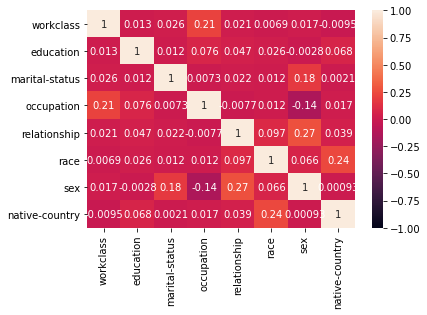

In [7]:
sns.heatmap(data=df[categorical].corr(), annot=True, vmin=-1)


In [8]:
# split features and target
X_train = train.drop(['income' ], axis=1)
y_train = train['income']
X_test = test.drop(['income'], axis=1)
y_test = test['income']

In [9]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [10]:
randomf = RandomForestClassifier(random_state=30)
randomf = randomf.fit(X_train, y_train)


score_train = randomf.score(X_train, y_train)
score_test=randomf.score(X_test, y_test)


y_pred = randomf.predict(X_test)


In [11]:

print("Evaluating the model on the training set yields an accuracy of {:.2f}%".format(score_train*100))
print("Evaluating the model on the testing set yields an accuracy of {:.2f}%".format(score_test*100))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 11559 = true positive
# 876 = false posite
# 1518 = false negative
# 2328 = true negative
score_manual = (11559+2328)/16281
print("Manual check of confusion matrix accuracy is {:.2f}%".format(score_manual*100))

Evaluating the model on the training set yields an accuracy of 99.99%
Evaluating the model on the testing set yields an accuracy of 85.14%
[[11573   862]
 [ 1558  2288]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.59      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.76      0.78     16281
weighted avg       0.84      0.85      0.85     16281

Manual check of confusion matrix accuracy is 85.30%


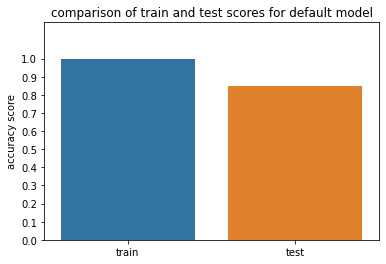

In [12]:
split = ['train', 'test']
scores = [(randomf.score(X_train, y_train)), randomf.score(X_test, y_test)]
sns.barplot(x=split, y=scores)

plt.ylim([0, 1.2])

plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('comparison of train and test scores for default model')

plt.ylabel('accuracy score')

plt.show()

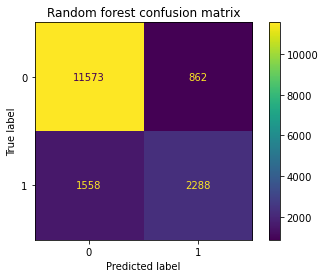

In [13]:
def plt_confusion_matrix(classifier, X_test, y_test):
    ''' returns confusion matrix of a classifier and x, y test'''
    plot_confusion_matrix(randomf, X_test, y_test)
    plt.title('Random forest confusion matrix')
    plt.show()

plt_confusion_matrix(randomf, X_test, y_test)

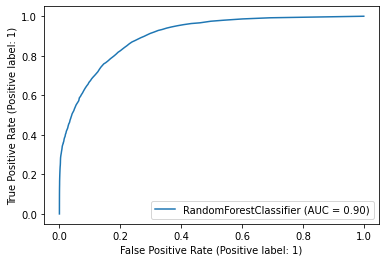

In [14]:
def plt_roc(classifier, X_test, y_test):
    ''' plots roc curve of classifier X, y test'''
    plot_roc_curve(classifier, X_test, y_test)
    plt.show()

plt_roc(randomf, X_test, y_test )

In [15]:
y_pred_proba = randomf.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba[:, 1]))

0.9004000417354854


In [16]:


cross_val_score = cross_val_score(randomf, X_train, y_train, cv=10)

print(cross_val_score)
print("Accuracy: {:.2f}% (+/- {:.2f})".format(cross_val_score.mean() * 100, cross_val_score.std() * 100))


[0.85323918 0.86025799 0.85042998 0.85104423 0.86117936 0.85810811
 0.85749386 0.86179361 0.86455774 0.85841523]
Accuracy: 85.77% (+/- 0.45)


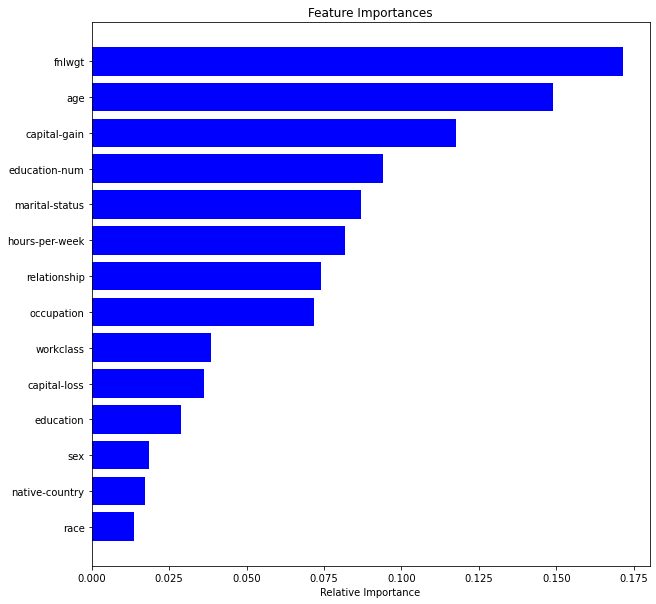

In [17]:
def feature_importance(X_train, y_train, df):
    features = df.columns
    model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(10,10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
feature_importance(X_train, y_train, train)

In [22]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor(random_state = 30)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
grid_search.fit(X_train, y_train)
        

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=30), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             return_train_score=True, verbose=2)

In [23]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 200}

In [24]:


#Evaluate the Best Model from Grid Search
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

print("The best parameters are :", result.best_params_)
print("The best accuracy is {:.2f}%:".format(result.best_score_ * 100))

NameError: name 'evaluate' is not defined